In [1]:
from qiskit import *

In [2]:
# Create 2-qubit quantum register

qr = QuantumRegister(2)

In [3]:
# Create 2-classical-bit to take measurements

cr = ClassicalRegister(2)

In [4]:
# Create circuit using above 2-bit registers

circuit = QuantumCircuit(qr, cr)

In [5]:
# Display our quantum circuit:

%matplotlib inline

circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

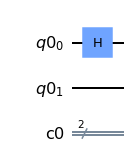

In [6]:
# Apply Hadamard transform to first qubit

circuit.h(qr[0])

circuit.draw(output = 'mpl')

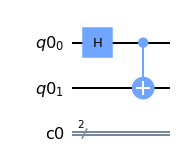

In [7]:
# Create a CNOT quantum gate

circuit.cx(qr[0], qr[1])

circuit.draw(output = 'mpl')

In [8]:
# Measure the results from the quantum register and store them in the classical register

circuit.measure(qr, cr)

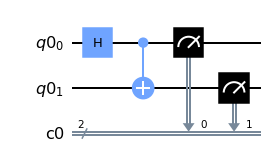

In [9]:
circuit.draw(output = 'mpl')

In [10]:
# Create a classical simulator of a quantum computer to execute the circuit on locally

simulator = Aer.get_backend('qasm_simulator')

In [11]:
# Execute the quantum circuit and get the results

result = execute(circuit, backend = simulator).result()

In [12]:
# Import tools to visualise the results from our quantum circuit

from qiskit.tools.visualization import plot_histogram

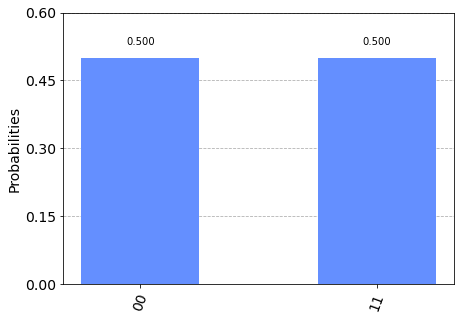

In [13]:
# Get the histogram data from the execution of our circuit

plot_histogram(result.get_counts(circuit))

### Note that the results of the experiment are roughly 50-50% for each of the possible outputs, i.e., 00 or 11. These are the two available states since the qubits always start in the state 0. However, we apply the Hadamard transform to the first qubit so it turns into a superposition of the up and down states of the Hadamard basis. Hence, there is a 50% chance that the first qubit is 1 or 0, and hence that the second qubit gets changed to a state 1 or remains 0, respectively.

In [14]:
# Load IBMQ account in order to run code on real quantum computer

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
# Get the provider of the available quantum computers

provider = IBMQ.get_provider('ibm-q')

# Get the specific quantum computer of our choice

qcomp = provider.get_backend('ibmq_santiago')

In [16]:
# Create a job to send to the IBMQ computer

job = execute(circuit, backend = qcomp)

In [17]:
# Import the IBMQ Job monitor to be able to queue circuit executions

from qiskit.tools.monitor import job_monitor

In [18]:
# Queue the job to the IBMQ computer

job_monitor(job)

Job Status: job has successfully run


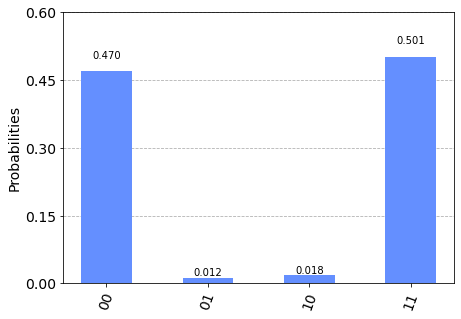

In [19]:
# Get the results from the executed job

result = job.result()

# Plot the results

plot_histogram(result.get_counts(circuit))

### Note that the results from the circuit execution on the real quantum computer also contains a fraction of 01 and 10 events, which was not the case for the simulated execution. That is because the simulator models a perfect quantum computer, whereas the IBMQ machines are susceptible to slight errors and noise in the measurements.